In [1]:
import pandas as pd
import uproot as ur
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
file = ur.open('/home/jmsardain/JetCalib/Akt4EMTopo.topo_cluster.root')["ClusterTree"]

In [3]:
df = file.arrays(library="pd")

In [4]:
df

,seqNumber,runNumber,eventNumber,avgMu,nPrimVtx,jetCnt,jetCalE,jetCalPt,jetCalEta,jetCalPhi,...,cluster_SIGNIFICANCE,cluster_CELL_SIGNIFICANCE,cluster_CELL_SIG_SAMPLING,cluster_AVG_LAR_Q,cluster_AVG_TILE_Q,cluster_ENG_BAD_HV_CELLS,cluster_N_BAD_HV_CELLS,cluster_PTD,cluster_MASS,cluster_SECOND_TIME
0,1,300000,47081445,40.5,25,1,42.830635,23.671888,-1.151738,2.314925,...,3.296875,8.00000,17.0,0.0,43.0000,0.000000,0.0,0.921976,0.121151,2.029901e+00
1,2,300000,47081445,40.5,25,1,42.830635,23.671888,-1.151738,2.314925,...,3.734375,10.12500,19.0,0.0,10.9375,0.000000,0.0,0.426342,0.209890,3.154958e+01
2,3,300000,47081445,40.5,25,1,42.830635,23.671888,-1.151738,2.314925,...,2.671875,5.03125,3.0,54.5,34.7500,0.060996,1.0,0.243209,0.068152,2.744274e+02
3,4,300000,47081445,40.5,25,1,42.830635,23.671888,-1.151738,2.314925,...,4.437500,6.93750,1.0,5248.0,0.0000,1.114011,3.0,0.398486,0.056535,1.877069e+01
4,5,300000,47081445,40.5,25,1,42.830635,23.671888,-1.151738,2.314925,...,3.500000,5.56250,1.0,12.0,0.0000,0.207000,3.0,0.219235,0.066530,2.121067e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59534803,436851,300000,46301181,80.5,39,24106,26.104311,24.384449,0.285432,1.531080,...,2.171875,5.15625,1.0,2512.0,0.0000,0.125291,1.0,0.402410,0.009800,1.764857e+01
59534804,436852,300000,46301181,80.5,39,24106,26.104311,24.384449,0.285432,1.531080,...,1.531250,7.25000,1.0,4640.0,0.0000,0.006057,1.0,0.465838,0.014290,1.166817e+01
59534805,436853,300000,46301181,80.5,39,24106,26.104311,24.384449,0.285432,1.531080,...,0.976562,4.03125,3.0,55.0,3.0000,0.000000,0.0,0.481570,0.010963,1.778675e+02
59534806,436854,300000,46301181,80.5,39,24106,26.104311,24.384449,0.285432,1.531080,...,0.648438,5.12500,0.0,342.0,0.0000,0.467972,1.0,0.647913,0.005408,0.000000e+00


## Get 2 dataframes: one for PU, one for non PU

In [6]:
PU = df[df["cluster_ENG_CALIB_TOT"]==0]

In [7]:
NonPU = df[df["cluster_ENG_CALIB_TOT"]>0]

In [8]:
bins = np.logspace(-1, 3, 100+1)

## ClusterE

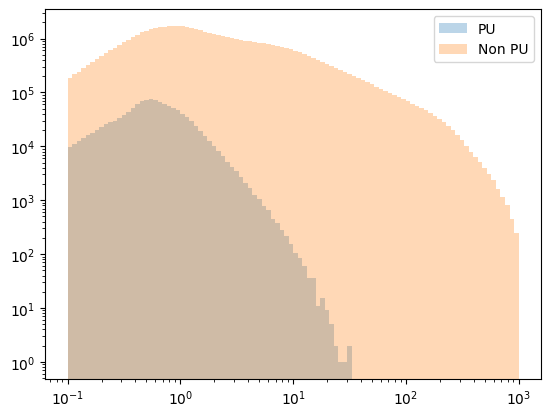

In [12]:
plt.hist(PU["clusterE"], bins=bins, label="PU", alpha=0.3)
plt.hist(NonPU["clusterE"], bins=bins, label="Non PU", alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.legend()

## Cluster Center Z

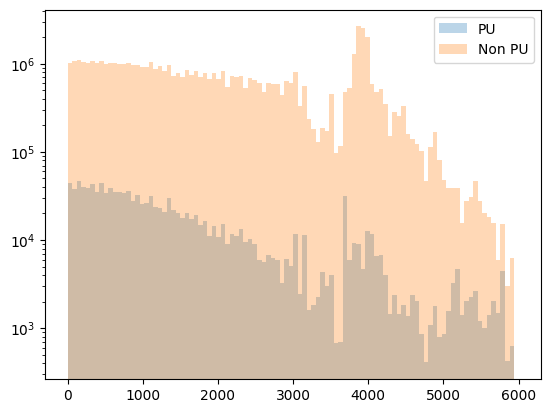

In [19]:
plt.clf()
plt.hist(np.abs(PU["cluster_CENTER_Z"]), bins=np.linspace(0, 6000, 101), label="PU", alpha=0.3)
plt.hist(np.abs(NonPU["cluster_CENTER_Z"]), bins=np.linspace(0, 6000, 101), label="Non PU", alpha=0.3)
# plt.xscale('log')
plt.yscale('log')
plt.legend()

## Cluster pTD

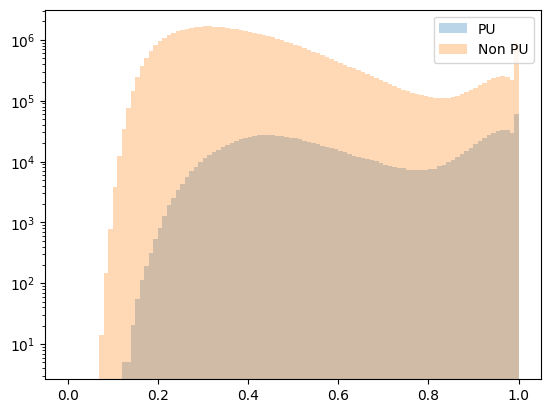

In [20]:
plt.clf()
plt.hist(np.abs(PU["cluster_PTD"]), bins=np.linspace(0, 1, 101), label="PU", alpha=0.3)
plt.hist(np.abs(NonPU["cluster_PTD"]), bins=np.linspace(0, 1, 101), label="Non PU", alpha=0.3)
# plt.xscale('log')
plt.yscale('log')
plt.legend()

## cluster_SECOND_TIME

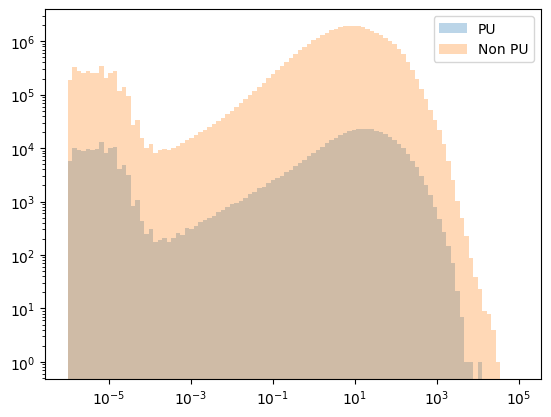

In [27]:
plt.clf()
plt.hist(np.abs(PU["cluster_SECOND_TIME"]), bins=np.logspace(-6, 5, 101), label="PU", alpha=0.3)
plt.hist(np.abs(NonPU["cluster_SECOND_TIME"]), bins=np.logspace(-6, 5, 101), label="Non PU", alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.legend()

## cluster Isolation

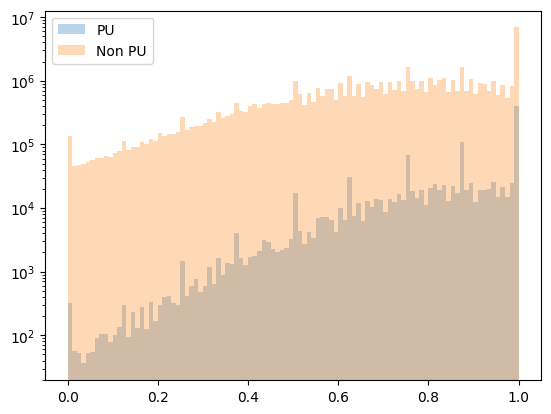

In [33]:
plt.clf()
plt.hist(np.abs(PU["cluster_ISOLATION"]), bins=np.linspace(0, 1, 101), label="PU", alpha=0.3)
plt.hist(np.abs(NonPU["cluster_ISOLATION"]), bins=np.linspace(0, 1, 101), label="Non PU", alpha=0.3)
# plt.xscale('log')
plt.yscale('log')
plt.legend()

In [35]:
## cluster_time

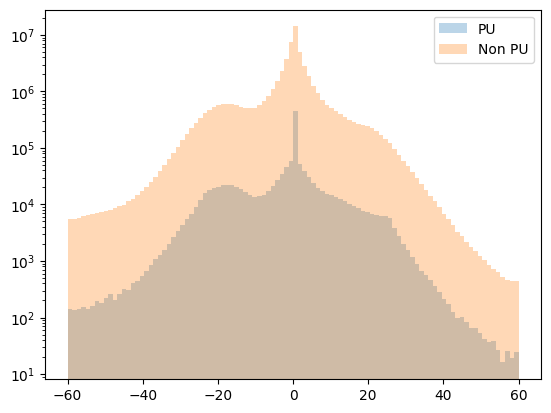

In [99]:
plt.clf()
plt.hist(PU["cluster_time"], bins=np.linspace(-60, 60, 101), label="PU", alpha=0.3)
plt.hist(NonPU["cluster_time"], bins=np.linspace(-60, 60, 101), label="Non PU", alpha=0.3)
# plt.xscale('log')
plt.yscale('log')
plt.legend()

In [40]:
df.columns

Index(['seqNumber', 'runNumber', 'eventNumber', 'avgMu', 'nPrimVtx', 'jetCnt',
       'jetCalE', 'jetCalPt', 'jetCalEta', 'jetCalPhi', 'jetRawE', 'jetRawPt',
       'jetRawEta', 'jetRawPhi', 'jetNConst', 'truthJetMatchRadius',
       'truthJetE', 'truthJetPt', 'truthJetRap', 'truthJetPhi', 'nCluster',
       'clusterIndex', 'cluster_nCells', 'cluster_nCells_tot', 'clusterECalib',
       'clusterPtCalib', 'clusterEtaCalib', 'clusterPhiCalib',
       'cluster_sumCellECalib', 'cluster_fracECalib', 'cluster_fracECalib_ref',
       'clusterE', 'clusterPt', 'clusterEta', 'clusterPhi', 'cluster_sumCellE',
       'cluster_time', 'cluster_fracE', 'cluster_fracE_ref',
       'cluster_EM_PROBABILITY', 'cluster_HAD_WEIGHT', 'cluster_OOC_WEIGHT',
       'cluster_DM_WEIGHT', 'cluster_ENG_CALIB_TOT', 'cluster_ENG_CALIB_OUT_T',
       'cluster_ENG_CALIB_OUT_L', 'cluster_ENG_CALIB_OUT_M',
       'cluster_ENG_CALIB_DEAD_T', 'cluster_ENG_CALIB_DEAD_L',
       'cluster_ENG_CALIB_DEAD_M', 'cluster_ENG_CALI

In [41]:
## cluster_FIRST_ENG_DENS

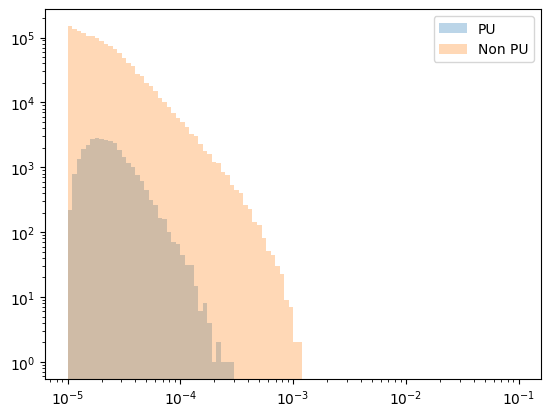

In [45]:
plt.clf()
plt.hist(PU["cluster_FIRST_ENG_DENS"], bins=np.logspace(-5, -1, 101), label="PU", alpha=0.3)
plt.hist(NonPU["cluster_FIRST_ENG_DENS"], bins=np.logspace(-5, -1, 101), label="Non PU", alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.legend()

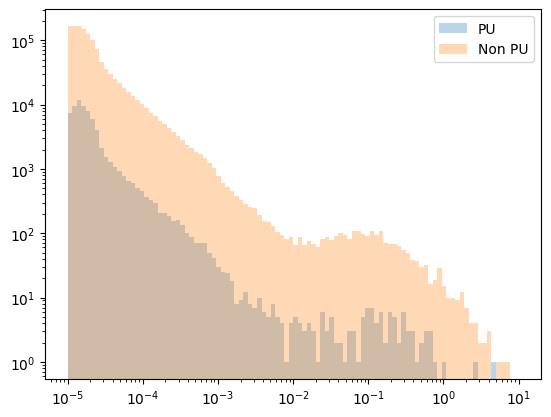

In [48]:
plt.clf()
plt.hist(PU["cluster_FIRST_ENG_DENS"]/PU["clusterE"], bins=np.logspace(-5, 1, 101), label="PU", alpha=0.3)
plt.hist(NonPU["cluster_FIRST_ENG_DENS"]/NonPU["clusterE"], bins=np.logspace(-5, 1, 101), label="Non PU", alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.legend()

## clusterE / cluster_time

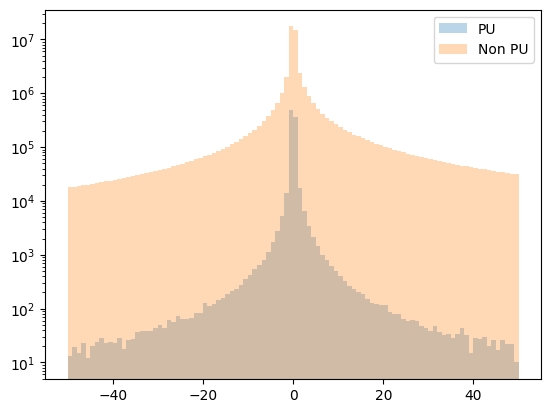

In [89]:
plt.clf()
plt.hist(PU["clusterE"]/PU["cluster_time"], bins=np.linspace(-50, 50, 101), label="PU", alpha=0.3)
plt.hist(NonPU["clusterE"]/NonPU["cluster_time"], bins=np.linspace(-50, 50, 101), label="Non PU", alpha=0.3)
# plt.xscale('log')
plt.yscale('log')
plt.legend()

## Let's go crazy

In [55]:
import networkx as nx

In [104]:
df["eventNumber"][50]

47081807

In [126]:
clusterE = [] 
clusterEta = []
cluster_time = []
labels = [] 


for i in [47081445, 47081807]:
    a = list(df[df["eventNumber"]==i].clusterE.values)
    b = list(df[df["eventNumber"]==i].clusterEtaCalib.values)
    c = list(df[df["eventNumber"]==i].cluster_time.values)
    d = list(np.where(np.array(df[df["eventNumber"]==47081445].cluster_ENG_CALIB_TOT.values) == 0, 1, 0))
    clusterE.append(a)
    clusterEta.append(b)
    cluster_time.append(c)
    labels.append(d)
    pass
    
print("clusterE = {}".format(clusterE))
print("clusterEta = {}".format(clusterEta))
print("cluster_time = {}".format(cluster_time))
print("labels = {}".format(labels))

clusterE = [[4.906106, 4.2948904, 2.3272974, 1.7640282, 1.6669978, 1.5564883, 1.4709957, 1.2580116, 0.9299956, 0.90700555, 0.8550085, 0.84801054, 0.80799323, 0.6829945, 0.6719932, 0.62223333, 0.5959938, 0.5495387, 0.5280029, 0.52000374, 0.37801084, 0.30700672, 0.1483212, 4.2041774, 2.443992, 1.7965311, 1.6889977, 1.444021, 1.3779931, 1.3110147, 1.259016, 0.9310096, 0.9230096, 0.75303096, 0.6670099, 0.5788728, 0.57098496, 0.10399473, 0.061001904], [13.153492, 8.843875, 7.235551, 3.8780088, 1.7080123, 1.6560916, 1.3199986, 1.1599877, 1.0139918, 0.76701075, 0.6159652, 0.42800298]]
clusterEta = [[-1.1447011, -1.3011556, -1.2637368, -0.88294286, -1.0696304, -1.0355009, -1.3918312, -1.0633633, -1.2335771, -1.0576745, -0.7898885, -1.501387, -0.9758738, -1.3154017, -1.1654167, -1.4971056, -1.0898792, -1.0768037, -0.9902038, -0.9361404, -0.7869042, -1.2404809, -1.3402777, 0.80894744, 0.6845126, 1.0046576, 0.7223266, 0.95158213, 1.1077923, 0.82552266, 0.8224182, 1.1613158, 1.0173451, 0.83528864,

In [57]:
G = nx.Graph()
for i in range(len(clusterE)):
    G.add_node(i, clusterE=clusterE[i], clusterEta=clusterEta[i], cluster_time=cluster_time[i])


In [58]:
for i in range(len(clusterE)):
    for j in range(i + 1, len(clusterE)):
        G.add_edge(i, j)

In [59]:
num_nodes = len(G.nodes())

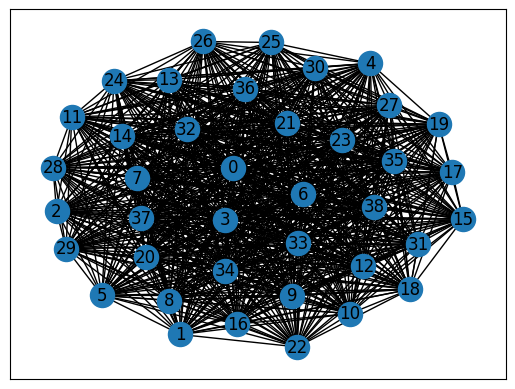

In [64]:
nx.draw_networkx(G)

In [134]:
G.number_of_edges()

741

In [65]:
import torch


In [76]:
adjacency_matrix = nx.adjacency_matrix(G)
adjacency_matrix = torch.tensor(adjacency_matrix.toarray(), dtype=torch.float32)

In [88]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [92]:
df1 = df.head(1000000)

In [94]:
df1.to_csv("/home/jmsardain/JetCalib/PUMitigation/fracdata.csv", index =False, sep=" ")

In [97]:
# clusterE  
# clusterEta 
cluster_time 

array([  1.9138057 ,   1.0557921 ,   0.9632114 , -24.528063  ,
         0.797     , -10.615871  ,   1.831     ,  35.428     ,
       -11.805     , -25.142     ,   4.653008  , -31.169     ,
         1.2160494 ,  14.361     ,  -0.875     ,   4.1771455 ,
        -2.4193134 ,  -7.878684  ,  -7.716     ,  -7.6458917 ,
       -24.971     ,  -9.609     ,   9.147042  ,   0.44541594,
       -11.318123  ,  -5.0034223 ,  16.72847   ,  17.061098  ,
       -26.405     ,   0.44247732, -31.959297  ,  -1.0448427 ,
        -4.463783  ,   6.6905146 , -20.850294  ,   8.770923  ,
         0.        , -22.1       ,  -1.05      ], dtype=float32)

## Create a training code using 2 graphs, one for training, one for testing.

In [136]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch_geometric
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

# Convert data to PyTorch tensors
x_train = torch.tensor(list(zip(clusterE[0], clusterEta[0], cluster_time[0])), dtype=torch.float32)
edge_index_train = torch.tensor(torch.combinations(torch.arange(x_train.size(0)), 2).t(), dtype=torch.long)  # Fully connected graph
y_train = torch.tensor(labels[0], dtype=torch.long)

x_test = torch.tensor(list(zip(clusterE[1], clusterEta[1], cluster_time[1])), dtype=torch.float32)
edge_index_test = torch.tensor(torch.combinations(torch.arange(x_test.size(0)), 2).t(), dtype=torch.long)  # Fully connected graph
y_test = torch.tensor(labels[1], dtype=torch.long)

# Create PyTorch Geometric Data objects
data_train = Data(x=x_train, edge_index=edge_index_train, y=y_train)
data_test = Data(x=x_test, edge_index=edge_index_test)

# Define a Graph Convolutional Network (GCN) model
class GCNModel(nn.Module):
    def __init__(self, in_channels, hidden_channels, num_classes):
        super(GCNModel, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Initialize model, optimizer, and loss function
model = GCNModel(in_channels=x_train.shape[1], hidden_channels=64, num_classes=2)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Training loop
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    out = model(data_train.x, data_train.edge_index)
    loss = criterion(out, data_train.y)
    loss.backward()
    optimizer.step()

# Evaluate the trained model on the test graph
model.eval()
with torch.no_grad():
    test_out = model(data_test.x, data_test.edge_index)
    predicted_labels = test_out.argmax(dim=1)

print("Predicted labels for the test graph:", predicted_labels.tolist())
# class_names = ["Class 0", "Class 1"]
# report = classification_report(y_test.cpu().numpy(), predicted_labels.cpu().numpy(), target_names=class_names)
# print(report)

/tmp/ipykernel_12379/2094895104.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index_train = torch.tensor(torch.combinations(torch.arange(x_train.size(0)), 2).t(), dtype=torch.long)  # Fully connected graph
/tmp/ipykernel_12379/2094895104.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index_test = torch.tensor(torch.combinations(torch.arange(x_test.size(0)), 2).t(), dtype=torch.long)  # Fully connected graph


Predicted labels for the test graph: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Create a fully connected graph using PyTorch

In [138]:
graph_list = []
for inner_list in clusterE:
    num_nodes = len(inner_list)
    edge_index = torch.tensor([[i, j] for i in range(num_nodes) for j in range(i+1, num_nodes)], dtype=torch.long).t().contiguous()
    x = torch.tensor(inner_list, dtype=torch.float).view(-1, 1)
    edge_attr = None  # You can add edge attributes here if needed

    graph = Data(x=x, edge_index=edge_index, edge_attr=edge_attr)
    graph_list.append(graph)

# Printing the graph list
for i, graph in enumerate(graph_list):
    print(f"Graph {i+1}:")
    print(graph)
    print()

Graph 1:
Data(x=[39, 1], edge_index=[2, 741])

Graph 2:
Data(x=[12, 1], edge_index=[2, 66])

